# Kaggle 신용카드 사기 탐지를 위한 classification (w/ imbalanced data)  
* 데이터 출처  
https://www.kaggle.com/mlg-ulb/creditcardfraud  (V16 이후 컬럼은 삭제)

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 데이터 준비 + 탐색 + 전처리

In [2]:
# 데이터 불러오기
data = pd.read_csv('example_data/creditcard_part.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,69.99,0


<AxesSubplot:xlabel='Class', ylabel='count'>

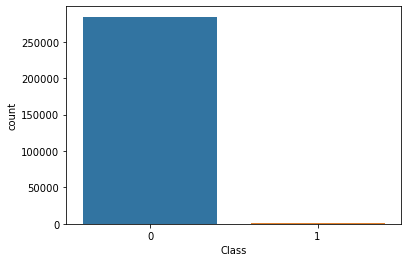

In [3]:
# class 시각화

sns.countplot(x='Class', data=data)

In [4]:
# 차이가 매우 커서 시각화로는 명확한 확인이 어려우므로, 확인
# Series.value_counts()

print(data['Class'].value_counts()) # Series.value_counts() 의 리턴값은 array
print("----> 클래스 1과 클래스 0의 차이는 1:{} 비율만큼 불균형함".format(int(sorted(data['Class'].value_counts())[1]/sorted(data['Class'].value_counts())[0])))

0    284315
1       492
Name: Class, dtype: int64
----> 클래스 1과 클래스 0의 차이는 1:577 비율만큼 불균형함


In [5]:
# np.bincount 활용

class_0, class_1 = np.bincount(data['Class'])
total = class_0 + class_1
print("----> 전체 {}개의 데이터 중, class 0의 개수는 {} + class 1의 개수는 {}".format(total, class_0, class_1))

----> 전체 284807개의 데이터 중, class 0의 개수는 284315 + class 1의 개수는 492


/Users/youranwoo/anaconda3/envs/adp/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

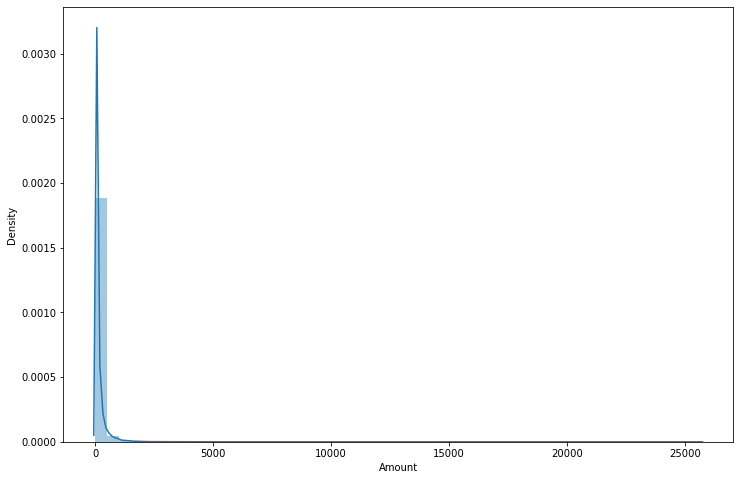

In [6]:
# Amount 분포 시각화

mpl.rcParams['figure.figsize'] = (12, 8)
sns.distplot(data['Amount'])

/Users/youranwoo/anaconda3/envs/adp/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_Amount', ylabel='Density'>

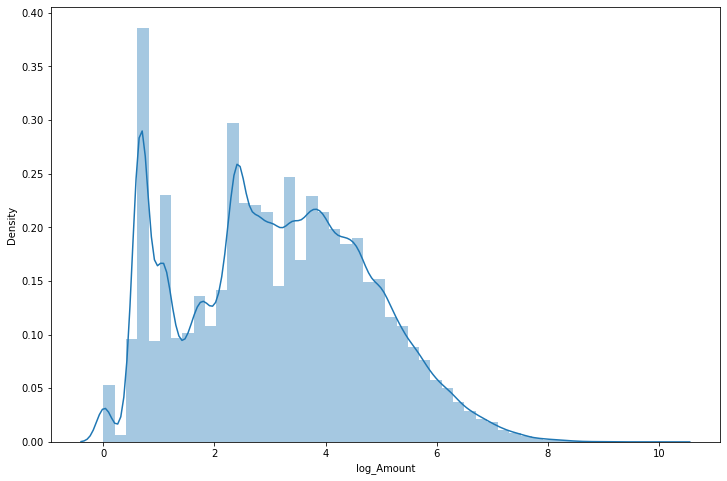

In [7]:
# 불균형 확인 -> 로그화

data['log_Amount'] = np.log1p(data['Amount'])
sns.distplot(data['log_Amount'])

<AxesSubplot:xlabel='log_Amount', ylabel='Class'>

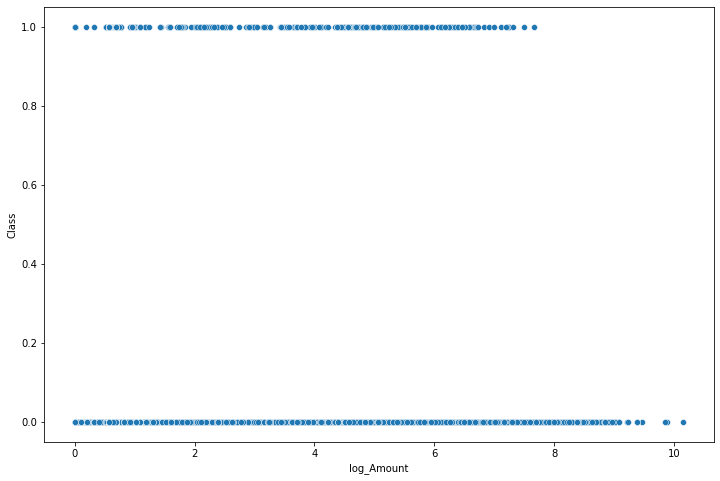

In [8]:
sns.scatterplot(x='log_Amount', y='Class', data=data)

<AxesSubplot:xlabel='Amount', ylabel='Class'>

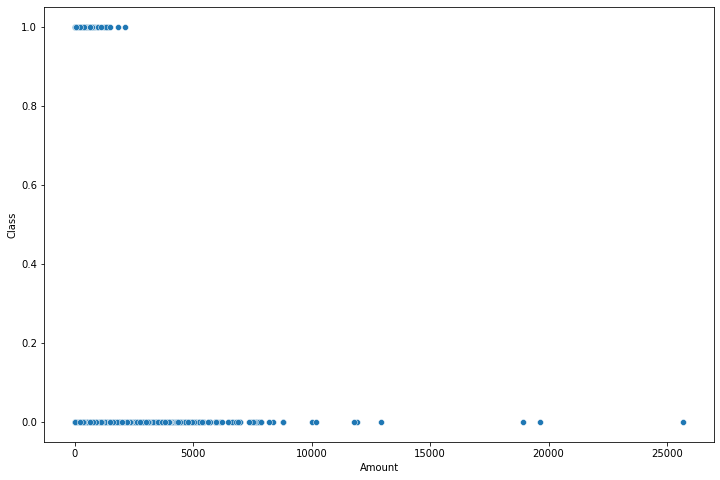

In [9]:
sns.scatterplot(x='Amount', y='Class', data=data)

In [10]:
# 임의로 컬럼 선택
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'log_Amount','Class']
df = data[cols]
df.head()

,V1,V2,V3,V4,V5,Amount,log_Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,5.014760,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,1.305626,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,378.66,5.939276,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,4.824306,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,4.262539,0


In [11]:
# 결측치 확인

df.isnull().sum()

V1            0
V2            0
V3            0
V4            0
V5            0
Amount        0
log_Amount    0
Class         0
dtype: int64

<AxesSubplot:xlabel='log_Amount', ylabel='Class'>

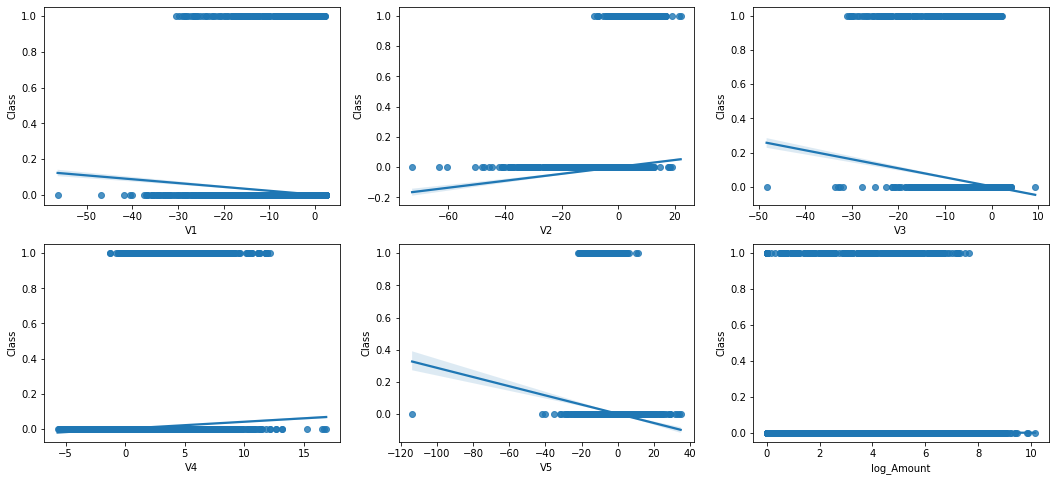

In [12]:
# 시각화 (산점도)

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(18,8))

sns.regplot(x='V1', y='Class', data=df, ax=ax1)
sns.regplot(x='V2', y='Class', data=df, ax=ax2)
sns.regplot(x='V3', y='Class', data=df, ax=ax3)
sns.regplot(x='V4', y='Class', data=df, ax=ax4)
sns.regplot(x='V5', y='Class', data=df, ax=ax5)
sns.regplot(x='log_Amount', y='Class', data=df, ax=ax6)

/Users/youranwoo/anaconda3/envs/adp/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/youranwoo/anaconda3/envs/adp/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/youranwoo/anaconda3/envs/adp/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

<AxesSubplot:xlabel='log_Amount', ylabel='Density'>

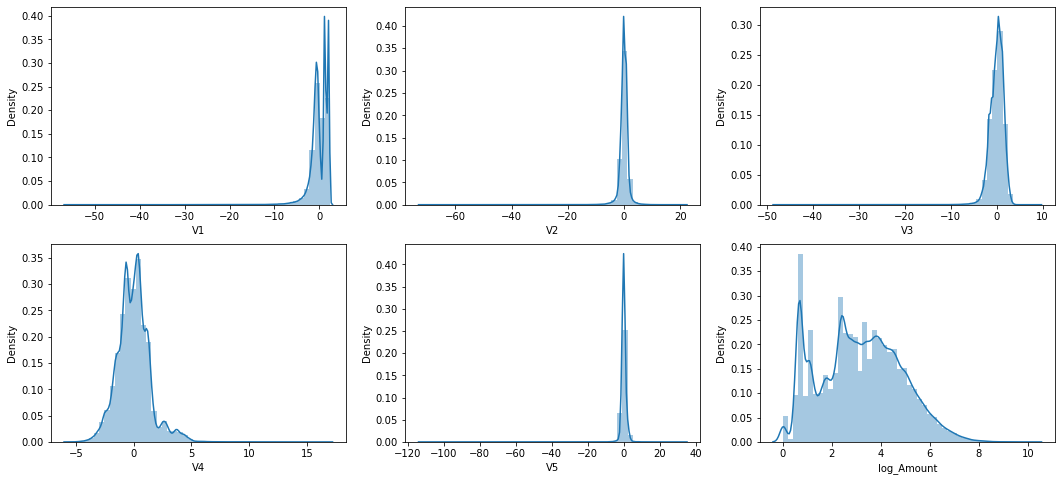

In [13]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(18,8))

sns.distplot(df['V1'], ax=ax1)
sns.distplot(df['V2'], ax=ax2)
sns.distplot(df['V3'], ax=ax3)
sns.distplot(df['V4'], ax=ax4)
sns.distplot(df['V5'], ax=ax5)
sns.distplot(df['log_Amount'], ax=ax6)

### 차원축소 (PCA)
* 출처 : https://rladuddms.tistory.com/4

In [14]:
# PCA 는 속성의 영향을 받으므로 스케일링을 해줘야 함

from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(df)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_scaled)
pca_result = pca.transform(df_scaled)

pca_cols = ['pca1', 'pca2']
df_pca = pd.DataFrame(pca_result, columns=pca_cols)
df_pca['Class'] = data['Class']
df_pca.head()

,pca1,pca2,Class
0,0.795144,-0.435222,0
1,-0.982726,0.049263,0
2,2.059362,-0.678659,0
3,0.576704,-0.823166,0
4,0.143798,-0.148782,0


/Users/youranwoo/anaconda3/envs/adp/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/youranwoo/anaconda3/envs/adp/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pca2', ylabel='Density'>

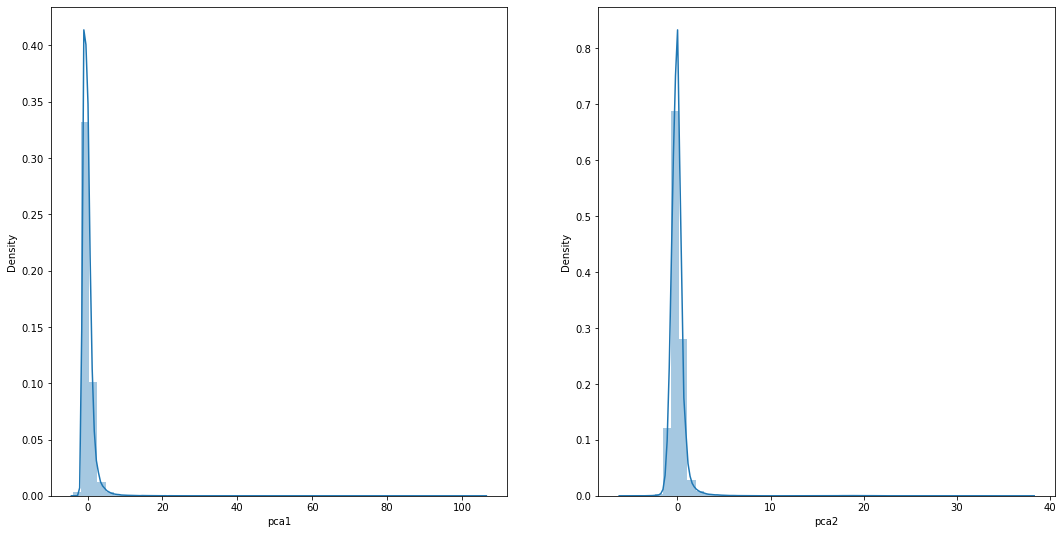

In [16]:
figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,9))

sns.distplot(df_pca['pca1'], ax=ax1)
sns.distplot(df_pca['pca2'], ax=ax2)

### 데이터셋 분리

In [17]:
# train / test 분리

from sklearn.model_selection import train_test_split

x_cols = ['pca1', 'pca2']
y_col = 'Class'

X_train, X_test, y_train, y_test = train_test_split(df_pca[x_cols], 
df_pca[y_col], 
test_size=0.2, 
random_state=0,
stratify=df_pca[y_col])

In [18]:
print("train: ", len(X_train), " , test: ", len(X_test))

train:  227845  , test:  56962


In [19]:
class_0, class_1 = np.bincount(y_train)
total = class_0 + class_1
print("y_train -> 전체 {}개의 데이터 중, class 0의 개수는 {} + class 1의 개수는 {}. 1: {}".format(total, class_0, class_1, int(class_0/class_1)))

y_train -> 전체 227845개의 데이터 중, class 0의 개수는 227451 + class 1의 개수는 394. 1: 577


In [20]:
class_0, class_1 = np.bincount(y_test)
total = class_0 + class_1
print("y_test -> 전체 {}개의 데이터 중, class 0의 개수는 {} + class 1의 개수는 {}. 1: {}".format(total, class_0, class_1, int(class_0/class_1)))

y_test -> 전체 56962개의 데이터 중, class 0의 개수는 56864 + class 1의 개수는 98. 1: 580


## Upsampling / Downsapling

* upsampling / downsampling 출처  
https://shinminyong.tistory.com/34  
http://www.igloosec.co.kr/BLOG_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%9D%B4%20%ED%98%84%EC%8B%A4%20%EC%84%B8%EA%B3%84%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC%20%EB%A7%8C%EB%82%AC%EC%9D%84%20%EB%95%8C%20%EC%83%9D%EA%B8%B8%20%EC%84%B8%20%EA%B0%80%EC%A7%80%20%EA%B3%A0%EB%AF%BC%EA%B1%B0%EB%A6%AC?bbsCateId=17  


In [24]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.reset_index(drop=True, inplace=True)
df_train.head()

,pca1,pca2,Class
0,0.125986,0.236252,0
1,-0.239013,0.309816,0
2,-1.357730,-0.504981,0
3,-0.991052,0.104526,0
4,0.163614,-0.017007,0


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

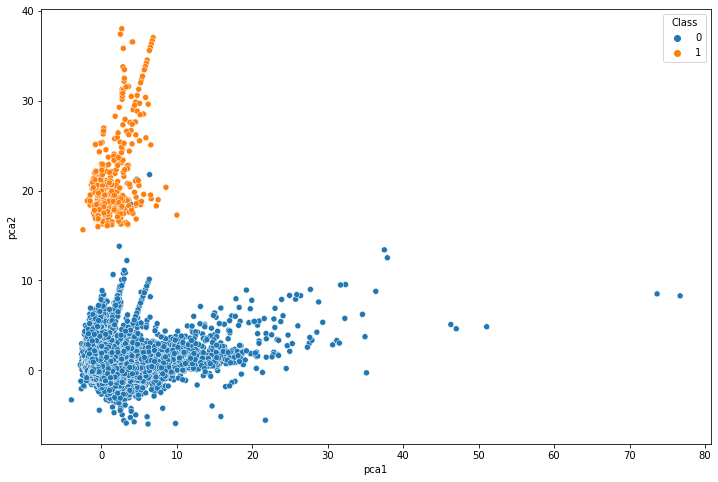

In [25]:
# train 데이터셋 시각화
sns.scatterplot(x='pca1', y='pca2', hue='Class', data=df_train)

### Upsampling (Oversampling)

* 기법 종류

    * **Random Over Sampling** : 무작위로 분포가 작은 클래스의 데이터를 생성  
    #
    * **ADASYN(Adaptive Synthetic Sampling)** : 분포가 작은 클래스 데이터와 그 데이터와 가장 가까운 무작위의 K개의 데이터 사이에 ***가상의 직선***을 그려서 직선상에 존재하는 가상의 분포가 작은 클래스 데이터를 생성하는 것
    #
    * **SMOTE** : ADASYN과 같은 방법론으로 데이터를 생성하지만 생성된 데이터가 분포가 적은 클래스에 포함되는 것이 아니라 분류 모형에 따라서 다르게 분류

In [38]:
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE

X_orand, y_orand = RandomOverSampler(random_state=0).fit_sample(X_train, y_train)
X_ads, y_ads = ADASYN(random_state=0).fit_sample(X_train, y_train)
X_smt, y_smt = SMOTE(random_state=0).fit_sample(X_train, y_train)

print("len of original df :", len(df_train))
print(df_train['Class'].value_counts())

df_orand = pd.concat([X_orand, y_orand], axis=1)
print("len of df_orand :", len(df_orand))
print(df_orand['Class'].value_counts())

df_ads = pd.concat([X_ads, y_ads], axis=1)
print("len of df_ads :", len(df_ads))
print(df_ads['Class'].value_counts())

df_smt = pd.concat([X_smt, y_smt], axis=1)
print("len of df_smt :", len(df_smt))
print(df_smt['Class'].value_counts())

df_orand.head()


len of original df : 227845
0    227451
1       394
Name: Class, dtype: int64
len of df_orand : 454902
1    227451
0    227451
Name: Class, dtype: int64
len of df_ads : 454907
1    227456
0    227451
Name: Class, dtype: int64
len of df_smt : 454902
1    227451
0    227451
Name: Class, dtype: int64


,pca1,pca2,Class
0,0.125986,0.236252,0
1,-0.239013,0.309816,0
2,-1.357730,-0.504981,0
3,-0.991052,0.104526,0
4,0.163614,-0.017007,0


[Text(0.5, 1.0, 'SMOTE')]

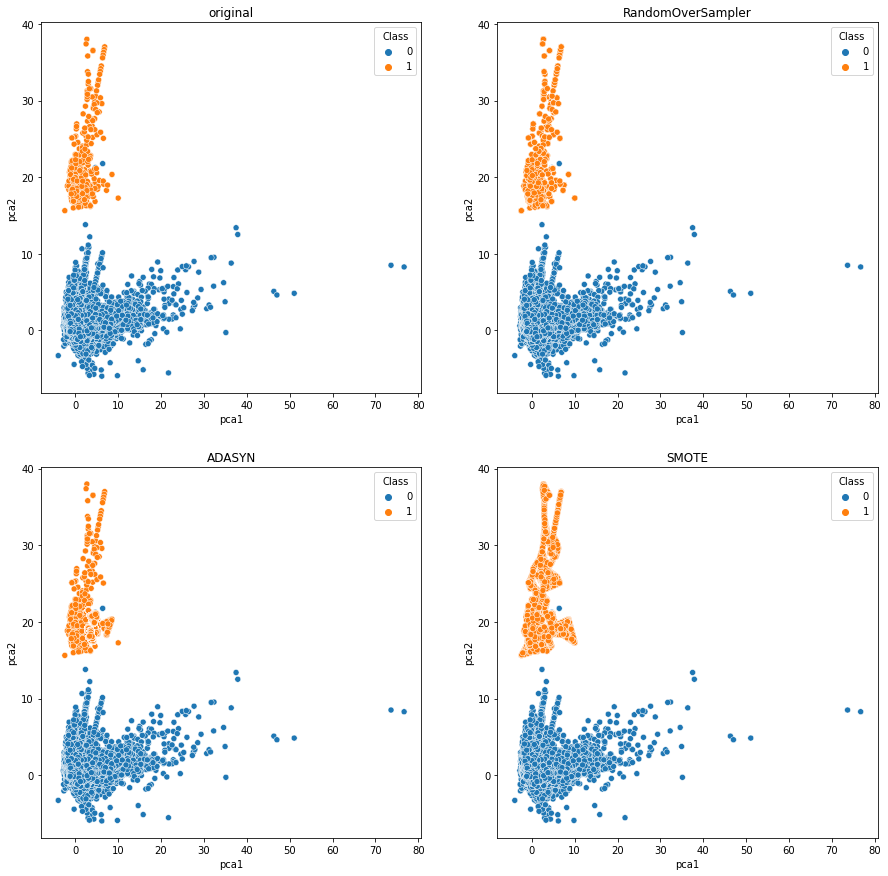

In [39]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

sns.scatterplot(x='pca1', y='pca2', hue='Class', data=df_train, ax=ax1)
sns.scatterplot(x='pca1', y='pca2', hue='Class', data=df_orand, ax=ax2)
sns.scatterplot(x='pca1', y='pca2', hue='Class', data=df_ads, ax=ax3)
sns.scatterplot(x='pca1', y='pca2', hue='Class', data=df_smt, ax=ax4)

ax1.set(title="original")
ax2.set(title="RandomOverSampler")
ax3.set(title="ADASYN")
ax4.set(title="SMOTE")

### Down Sampling

* 기법 종류

    * **Random Under Sampling** : 분포가 높은 클래스의 값을 어떠한 조건 없이 무작위로 삭제
    #
    * **Tomek link** : 서로 다른 클래스가 있을 때 서로 다른 클래스끼리 가장 가까운 데이터들이 토멕링크로 묶여서 토멕링크 중 분포가 높은 데이터를 제거하는 방법론 -> 클래스를 나누는 TreshHold를 분포가 높은 쪽으로 밀어 붙이는 효과
    #
    * **CNN(Condensed Nearest Neighbour)** : 데이터가 많은 클래스에 밀집된 데이터가 없을 때까지 데이터를 제거하여 데이터 분포에서 대표적인 데이터만 남도록 하는 방법
    #
    * **One Sided Selection** : 데이터가 많은 클래스에서 토멕링크에 해당하는 데이터를 제거하고, 나머지 데이터에 대해서는 Condensed Nearest Neighbor를 이용하여 밀집된 데이터를 제거
    #
    * **ENN(Edited Nearest Neighbours)** : 소수 클래스 주변의 다중 클래스 값을 제거하는 방법론 -> 토멕링크 방법론 처럼 클래스를 구분하는 임계점을 다중 클래스 쪽으로 밀어낼 수 있지만 제거 효과가 크지 않은 것
    #
    * **Neighbourhood Cleansing Rule** : CNN + ENN -> 분포가 큰 데이터에 대한 제거 효과가 크지 않지만 좀 더 직관적으로 두 클래스를 나눌 수 있는 장점

### Combine Sampling

* 기법 종류

    * **SMOTE + ENN**
    #
    * **SMOTE + Tomek link**